# Clustering Examples

This notebook contains some examples of clustering to show how to look for clusters in data and how to visualize several aspects of clustering. 


We will start with the simple iris data set. 

In [1]:
options(repr.plot.width=10, repr.plot.height=10)


head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


It already comes with the class labels; we know the Species of each observation. Below is the original data: 

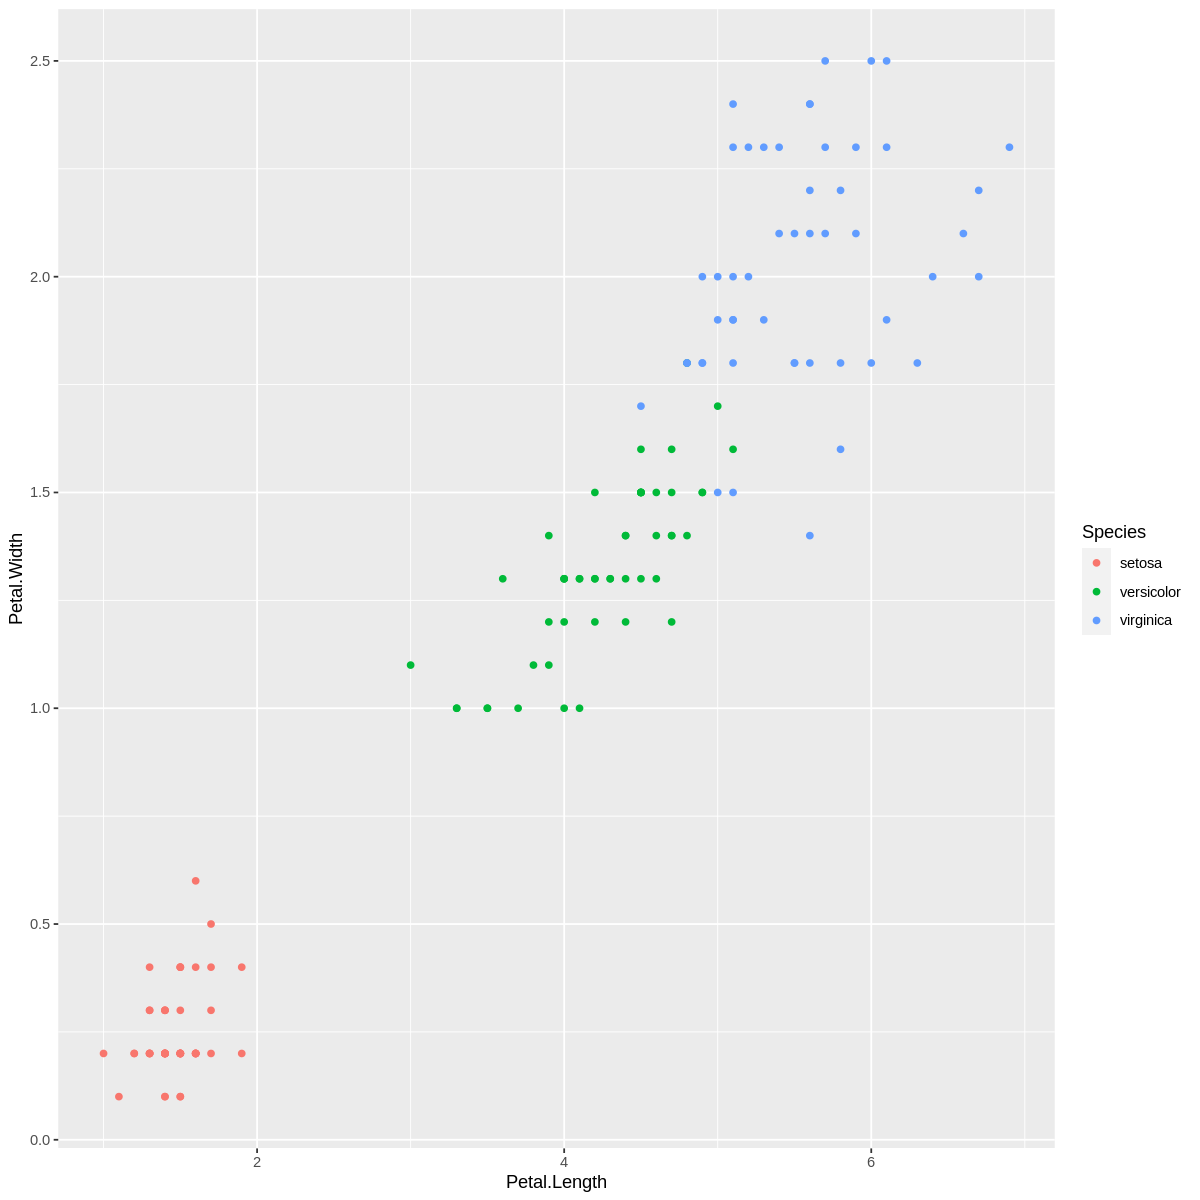

In [2]:
library(ggplot2)
ggplot(iris, aes(x=Petal.Length, y=Petal.Width, color=Species)) + geom_point() 

Let's create a data frame and get only two variables; Petal.Length and Petal.Width. We are not taking the Species variable, so in this data frame, there is no labels. 

In [3]:
iris_c = iris[,3:4]

In [4]:
head(iris_c)

,Petal.Length,Petal.Width
,<dbl>,<dbl>
1,1.4,0.2
2,1.4,0.2
3,1.3,0.2
4,1.5,0.2
5,1.4,0.2
6,1.7,0.4


In the unsupervised setting, we don't know where the observation belong: 

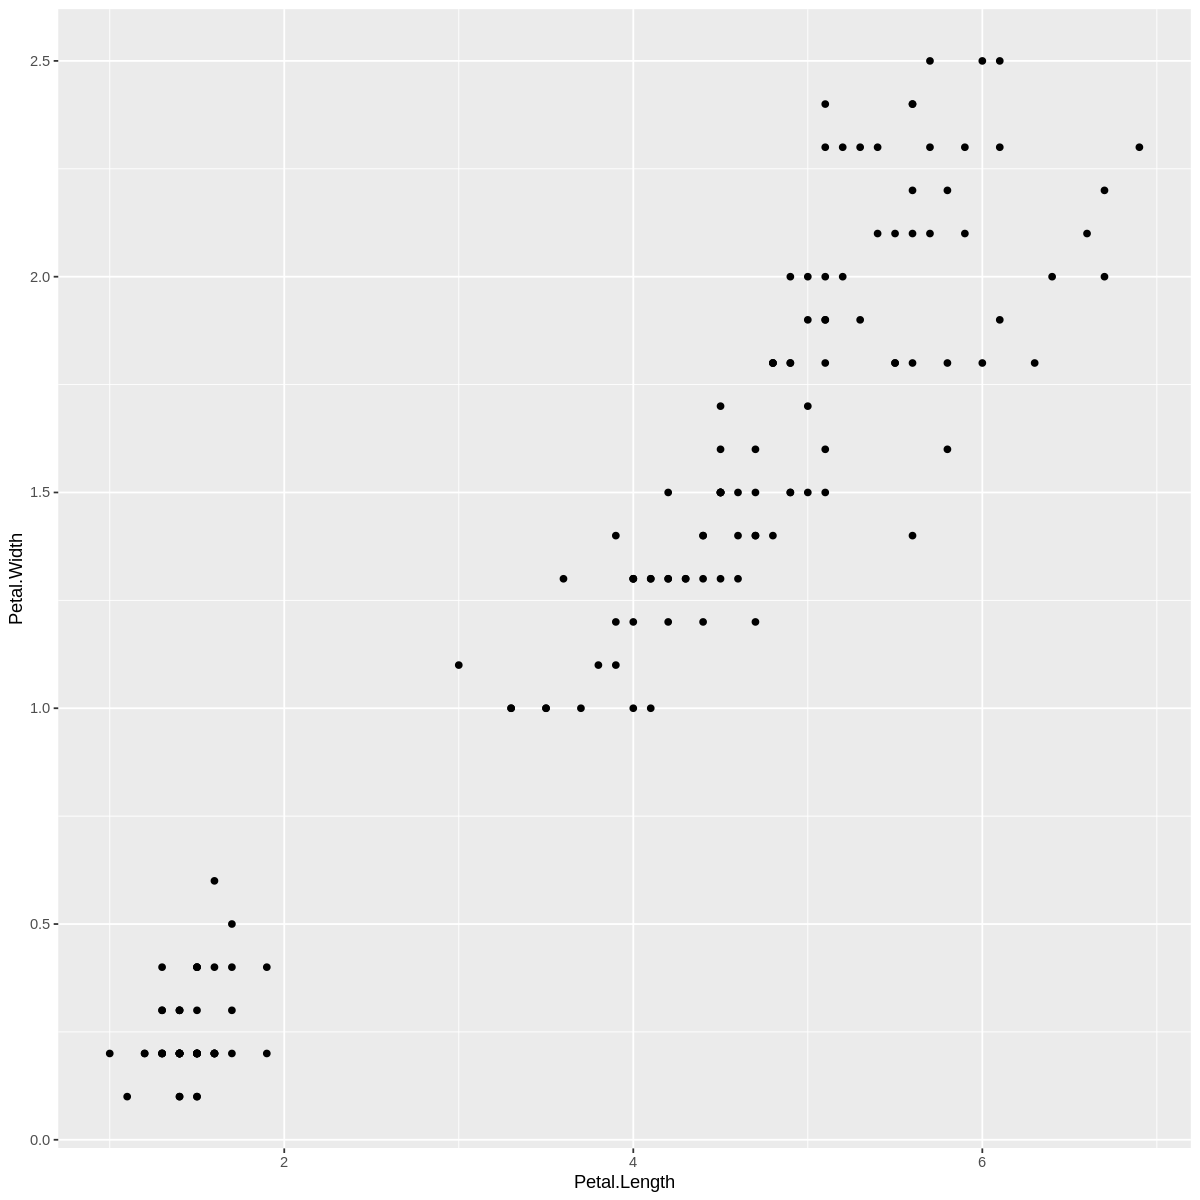

In [5]:
ggplot(iris_c, aes(x=Petal.Length, y=Petal.Width)) + geom_point() 

Let's create a clustering using K-Means. By looking at the above plot, we can tell that there are probably 2 or 3 clusters. If we know that we have to deal with three species, we can specify k as 3. Also, make sure to assign `nstart` so that kmeans can run multiple times. 

In [6]:
set.seed(100)
i_clust <- kmeans(iris_c, 3, nstart = 20)

In [7]:
i_clust # Look at the return value; it contains several structures 


K-means clustering with 3 clusters of sizes 50, 52, 48

Cluster means:
  Petal.Length Petal.Width
1     1.462000    0.246000
2     4.269231    1.342308
3     5.595833    2.037500

Clustering vector:
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 3 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 2 3 3 3 3
[112] 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3
[149] 3 3

Within cluster sum of squares by cluster:
[1]  2.02200 13.05769 16.29167
 (between_SS / total_SS =  94.3 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [8]:

# These are the centroids of the clusters 
i_clust$centers

# These are the clluster labels assigned to each observation 
i_clust$cluster

,Petal.Length,Petal.Width
1,1.462000,0.246000
2,4.269231,1.342308
3,5.595833,2.037500


[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 3 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 2 3 3 3 3
[112] 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3
[149] 3 3

In [9]:
dfc <- data.frame(i_clust$centers)


Let's plot the clusters and the cluster centers. 

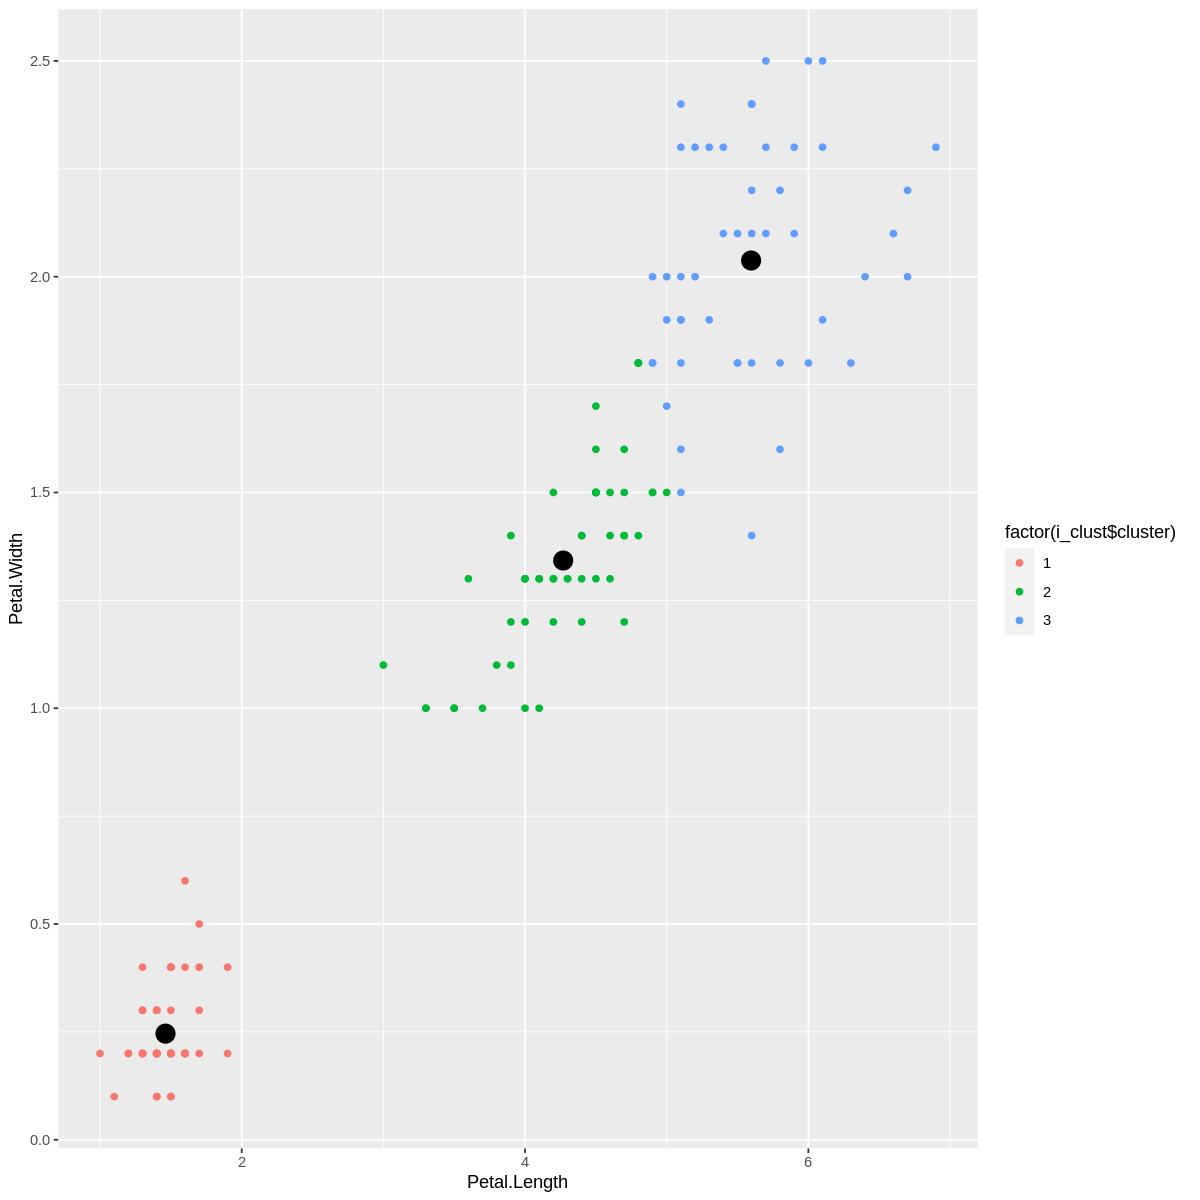

In [10]:

ggplot() + 

geom_point(data=iris_c, aes(x=Petal.Length, y=Petal.Width, color=factor(i_clust$cluster))) + 

geom_point(data=dfc, aes(x=Petal.Length, y=Petal.Width), color="black",size=5)

Let's compute a confusion table. 

**IMPORTANT!** Remember that this is an unsupervised modeling example. We do not know what actual labels are. All we can do is to create clusters and randomly label them as 1, 2, 3, etc. What the clustering algorithm labels as 1, for example,  may actually correspond to a label 3, etc. So the confusion table can show gross errors. Since cluster labels are random, we can simply shuffle the labels for clusters to get the highest accuracy. 

In [11]:
table(i_clust$cluster, iris$Species)

   
    setosa versicolor virginica
  1     50          0         0
  2      0         48         4
  3      0          2        46

Here, the clustering algorithm created clusters that mostly conforms with the actual groups. 

We can visualize clustering results in the following ways, too: 

In [12]:
library(fpc)
library(cluster)

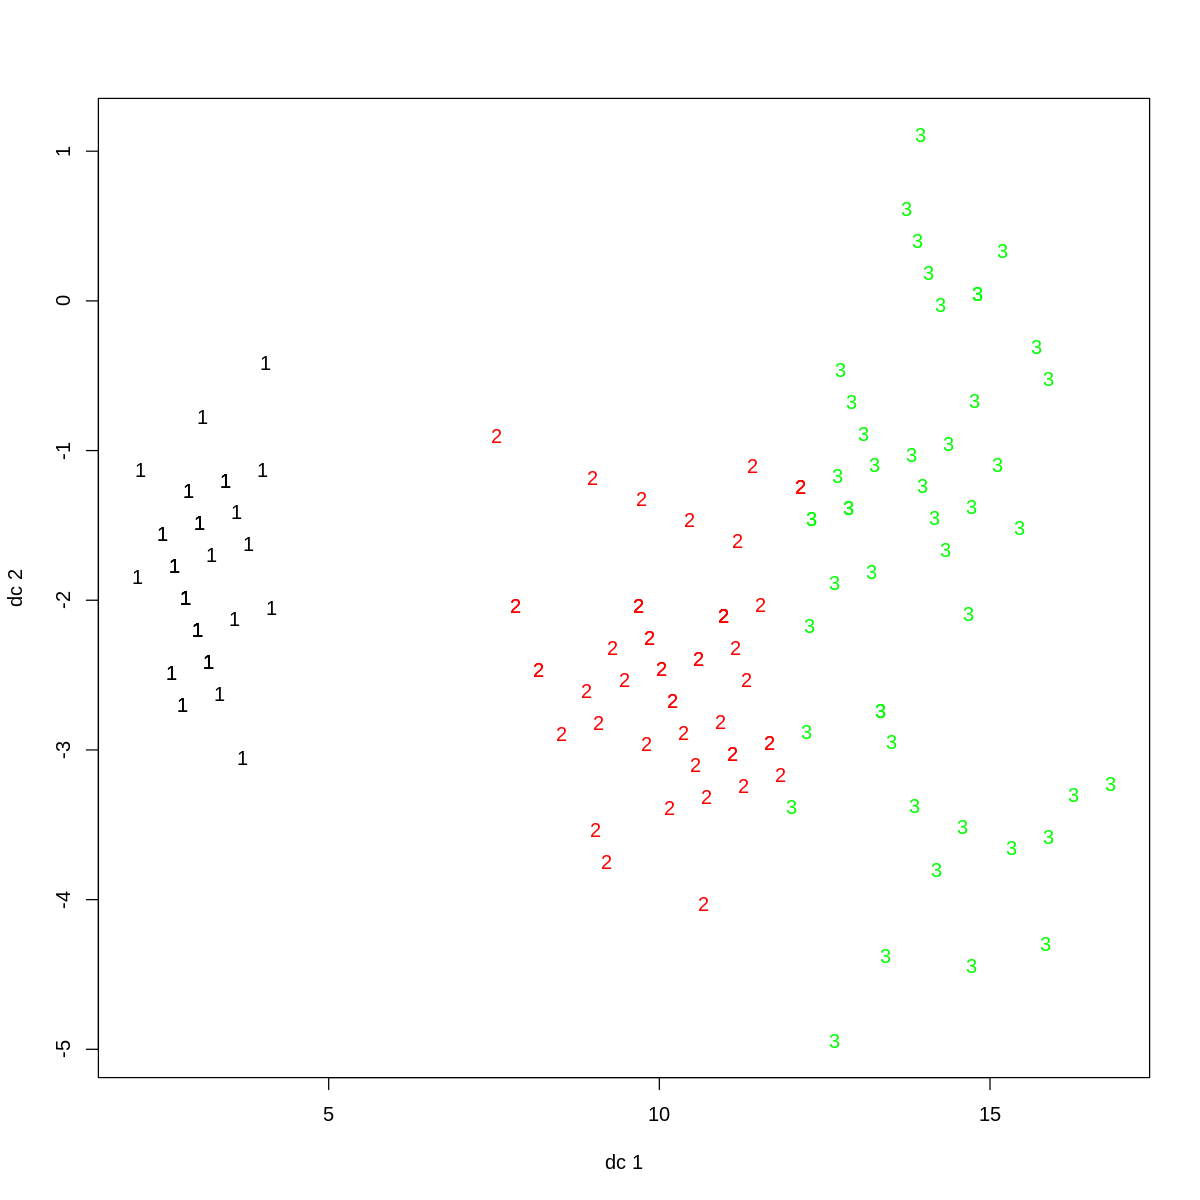

In [13]:
plotcluster(iris_c, i_clust$cluster)


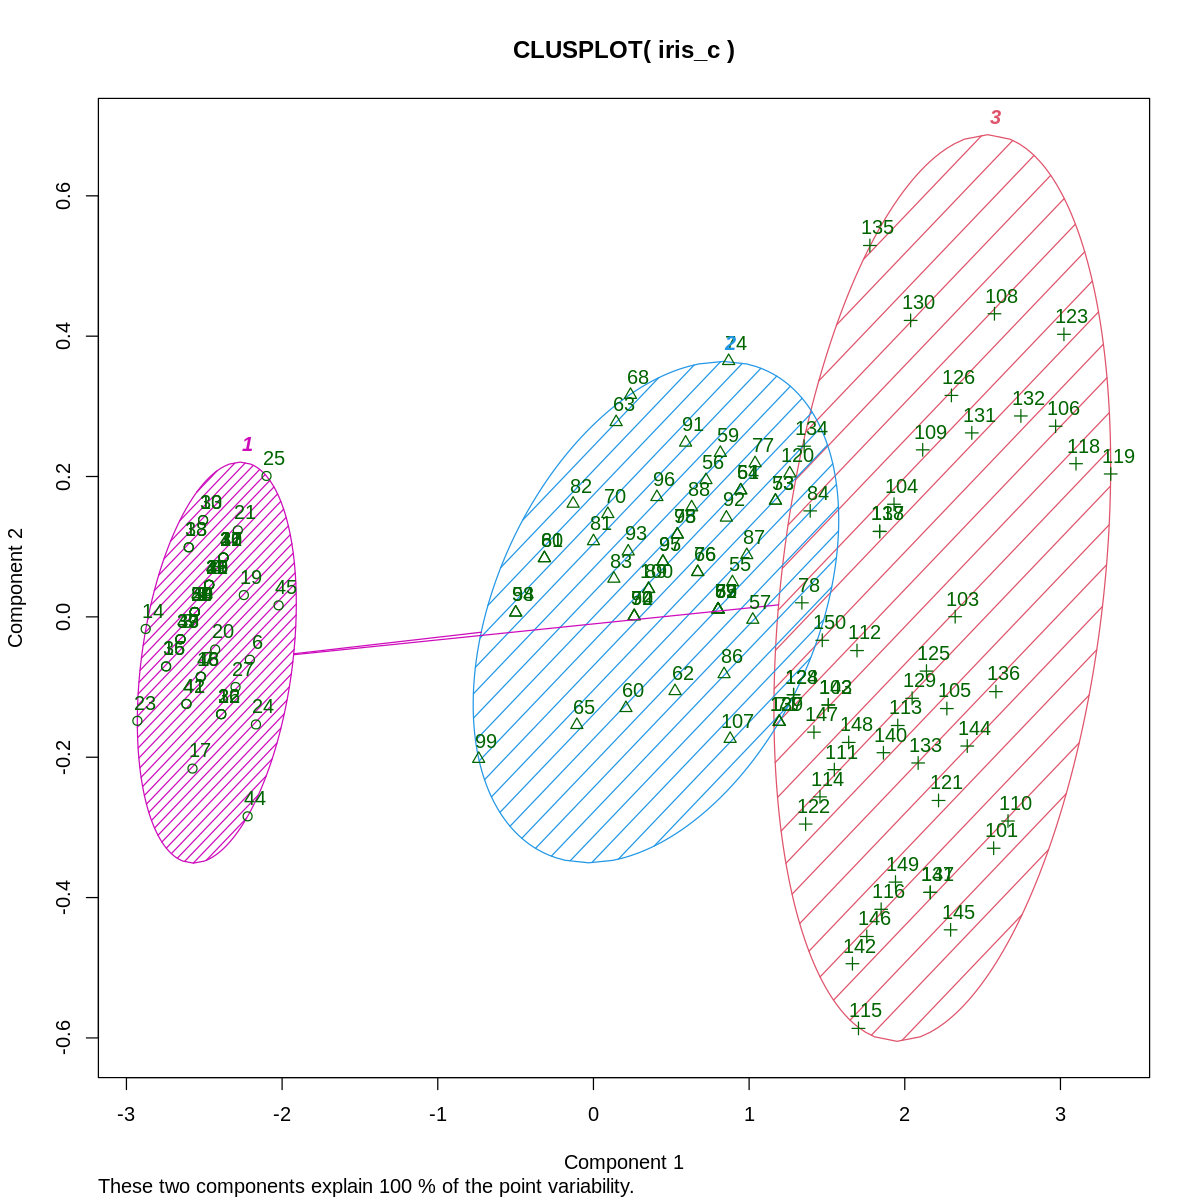

In [14]:
clusplot(iris_c, i_clust$cluster, color=TRUE, shade=TRUE, labels=2)


What you see above is a generalized way of showing clusters; if we have more than two dimensions, these methods will produce two dimensional plots similar to PCA to show the clusters projected onto two dimensions. 


---

Let's look at the US arrests data set. **Remember that scaling data is good practice;** we don't want our analysis affected by the different scales of the variables. Variables with larger units would dominate the results. 

In [15]:
df <- USArrests
df <- na.omit(df)
df <- scale(df)
head(df)
dim(df)

,Murder,Assault,UrbanPop,Rape
Alabama,1.24256408,0.7828393,-0.5209066,-0.003416473
Alaska,0.50786248,1.1068225,-1.2117642,2.484202941
Arizona,0.07163341,1.4788032,0.9989801,1.042878388
Arkansas,0.23234938,0.2308680,-1.0735927,-0.184916602
California,0.27826823,1.2628144,1.7589234,2.067820292
Colorado,0.02571456,0.3988593,0.8608085,1.864967207


[1] 50  4

One of the ways to analyze the data is to see if there are natural groupings (clusters) in it; observations that share similar characteristics can be grouped into clusters and analyzing those clusters as sub-groups, we can get insights from the data. 


First, we should have some idea if the data is suitable for clustering. The following code creates a distance matrix. If we see blocks in the distance matrix, that shows that there are some clusters in the data. 

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



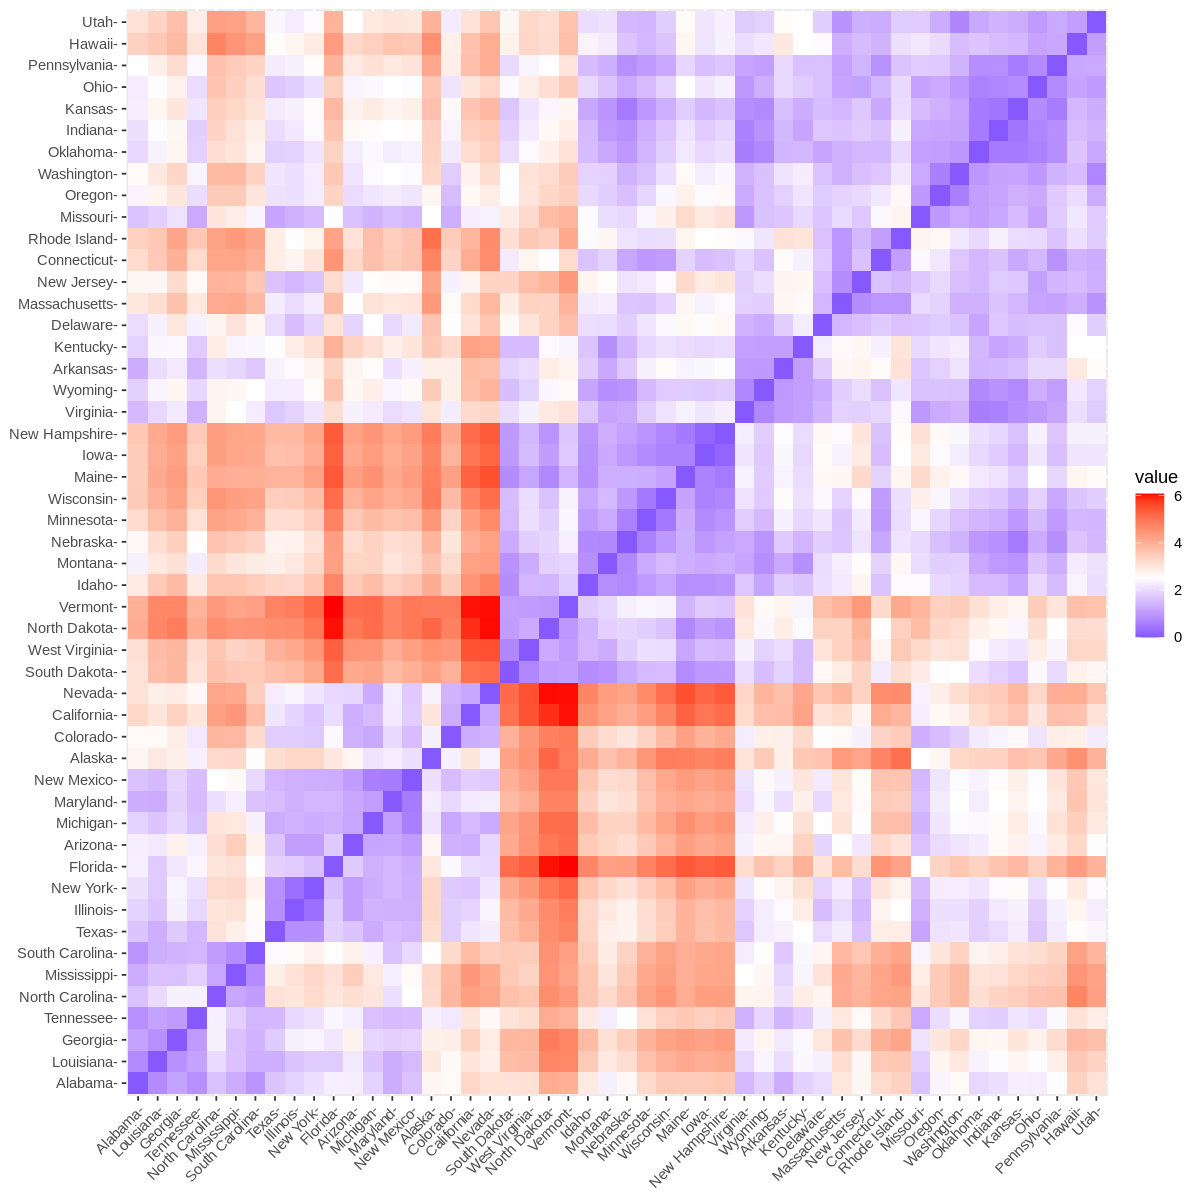

In [16]:
library(factoextra)
distance <- get_dist(df)
fviz_dist(distance, gradient = list(low = "blue", mid = "white", high = "red"), order=TRUE)

The above distance matrix suggests that there are some clusters in the data. Small distances are blue, large distances are red. 


We can also use the following function to get the same idea; the Hopkins statistic above 0.5 suggests clusterable data. 

$hopkins_stat
[1] 0.6114869

$plot


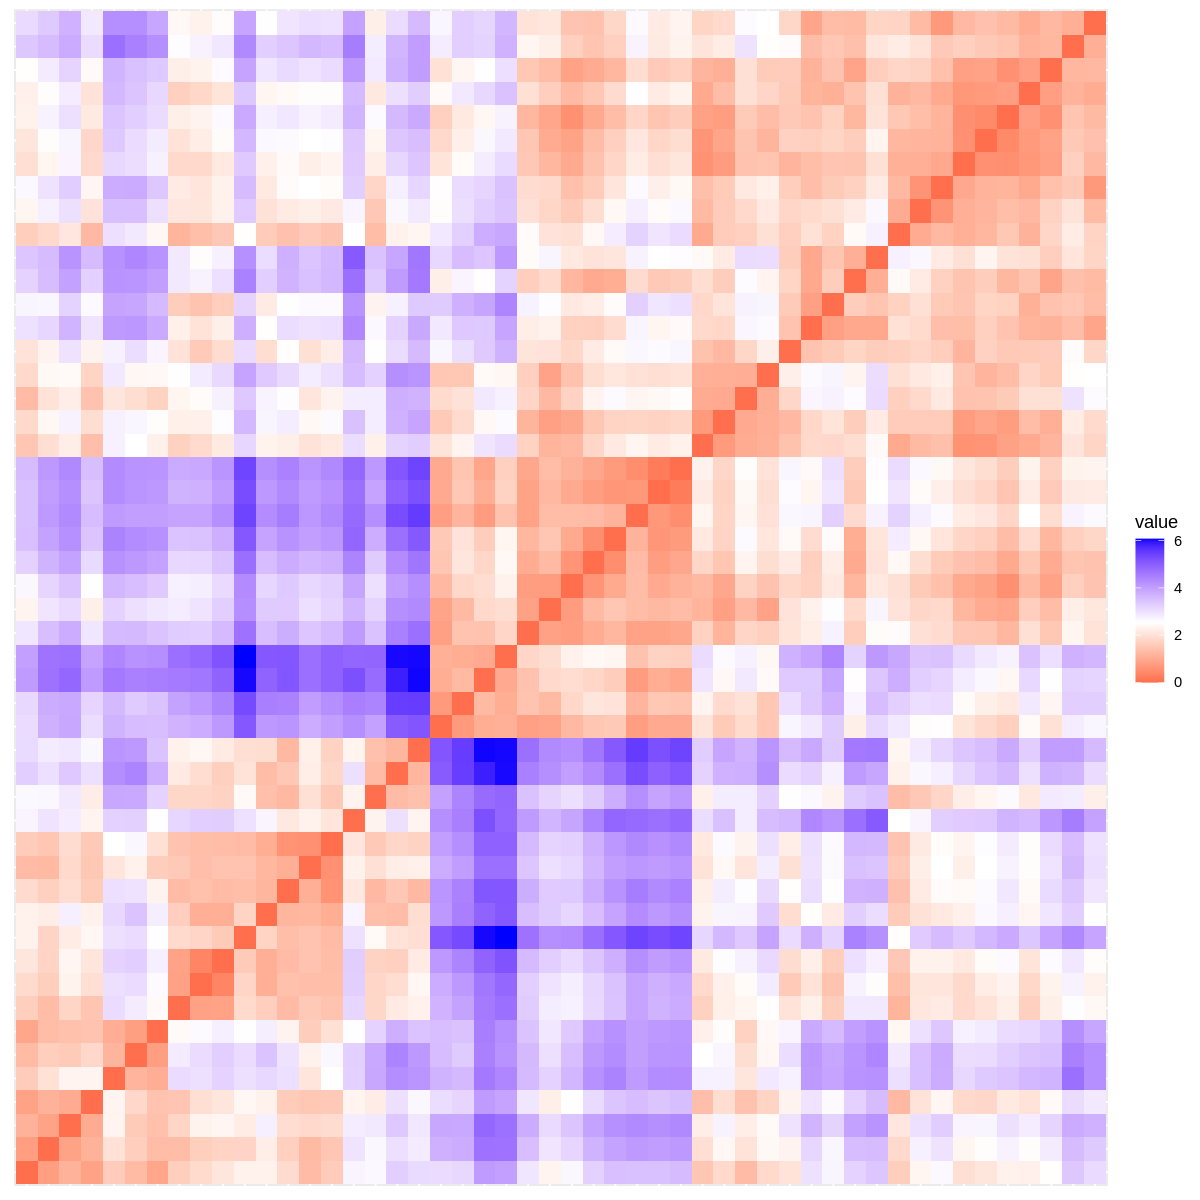

In [17]:
get_clust_tendency(data = df, n=10)

Let's do a kmeans clustering with two clusters. 

In [18]:
kclust <- kmeans(df, centers = 2, nstart = 20)
str(kclust)

List of 9
 $ cluster     : Named int [1:50] 1 1 1 2 1 1 2 2 1 1 ...
  ..- attr(*, "names")= chr [1:50] "Alabama" "Alaska" "Arizona" "Arkansas" ...
 $ centers     : num [1:2, 1:4] 1.005 -0.67 1.014 -0.676 0.198 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:2] "1" "2"
  .. ..$ : chr [1:4] "Murder" "Assault" "UrbanPop" "Rape"
 $ totss       : num 196
 $ withinss    : num [1:2] 46.7 56.1
 $ tot.withinss: num 103
 $ betweenss   : num 93.1
 $ size        : int [1:2] 20 30
 $ iter        : int 1
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


In [19]:
kclust$centers

,Murder,Assault,UrbanPop,Rape
1,1.004934,1.0138274,0.1975853,0.8469650
2,-0.669956,-0.6758849,-0.1317235,-0.5646433


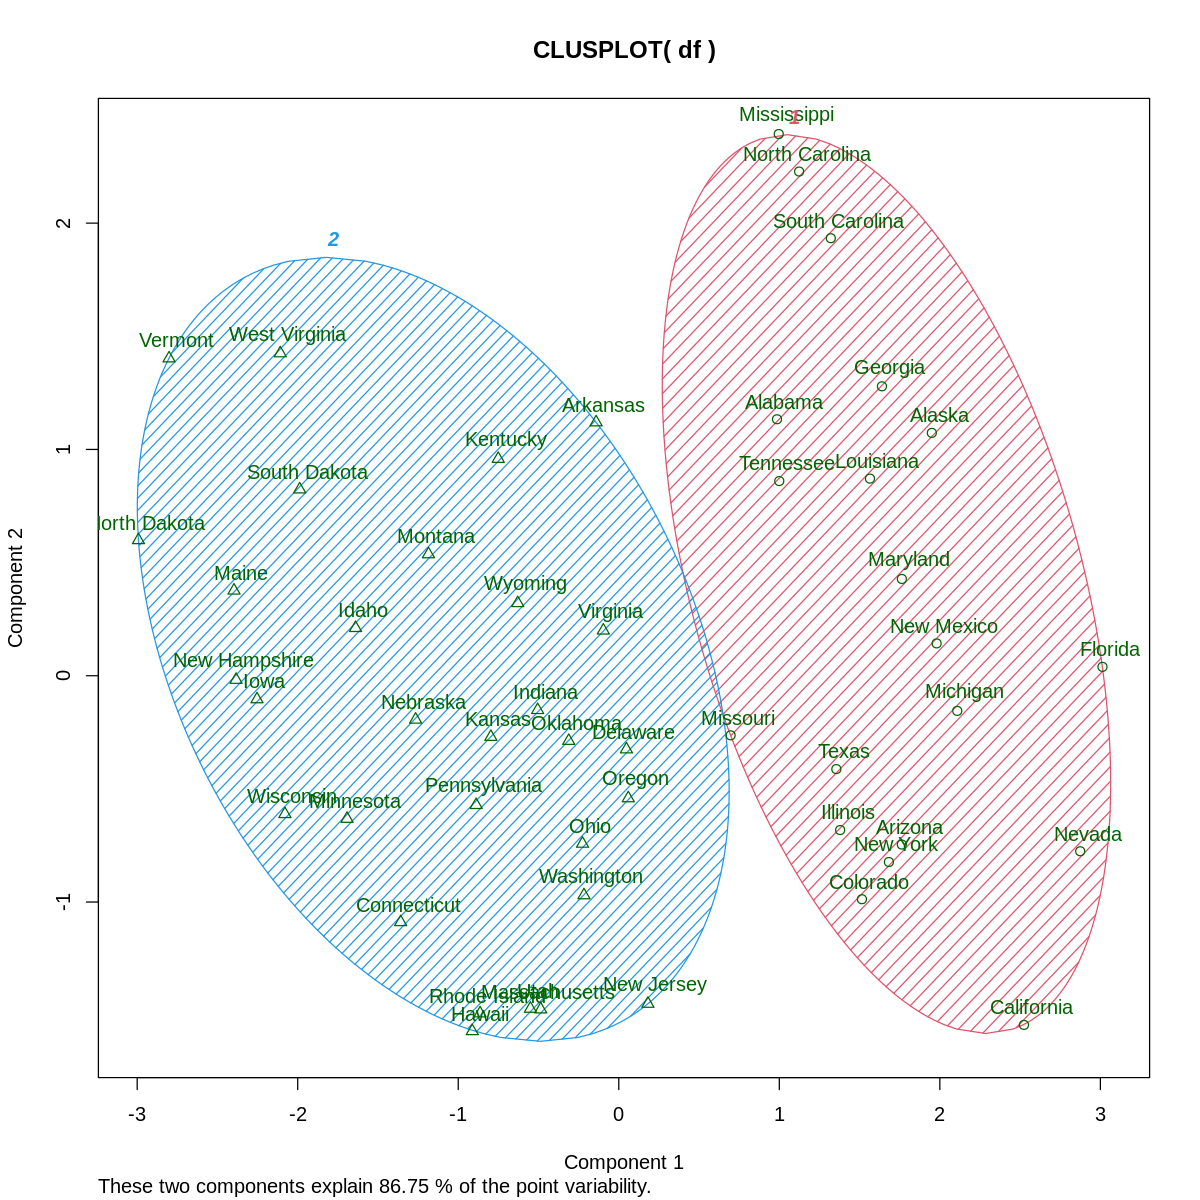

In [20]:
#Let's visualize the clusters:

clusplot(df, kclust$cluster, color=TRUE, shade=TRUE, labels=2)


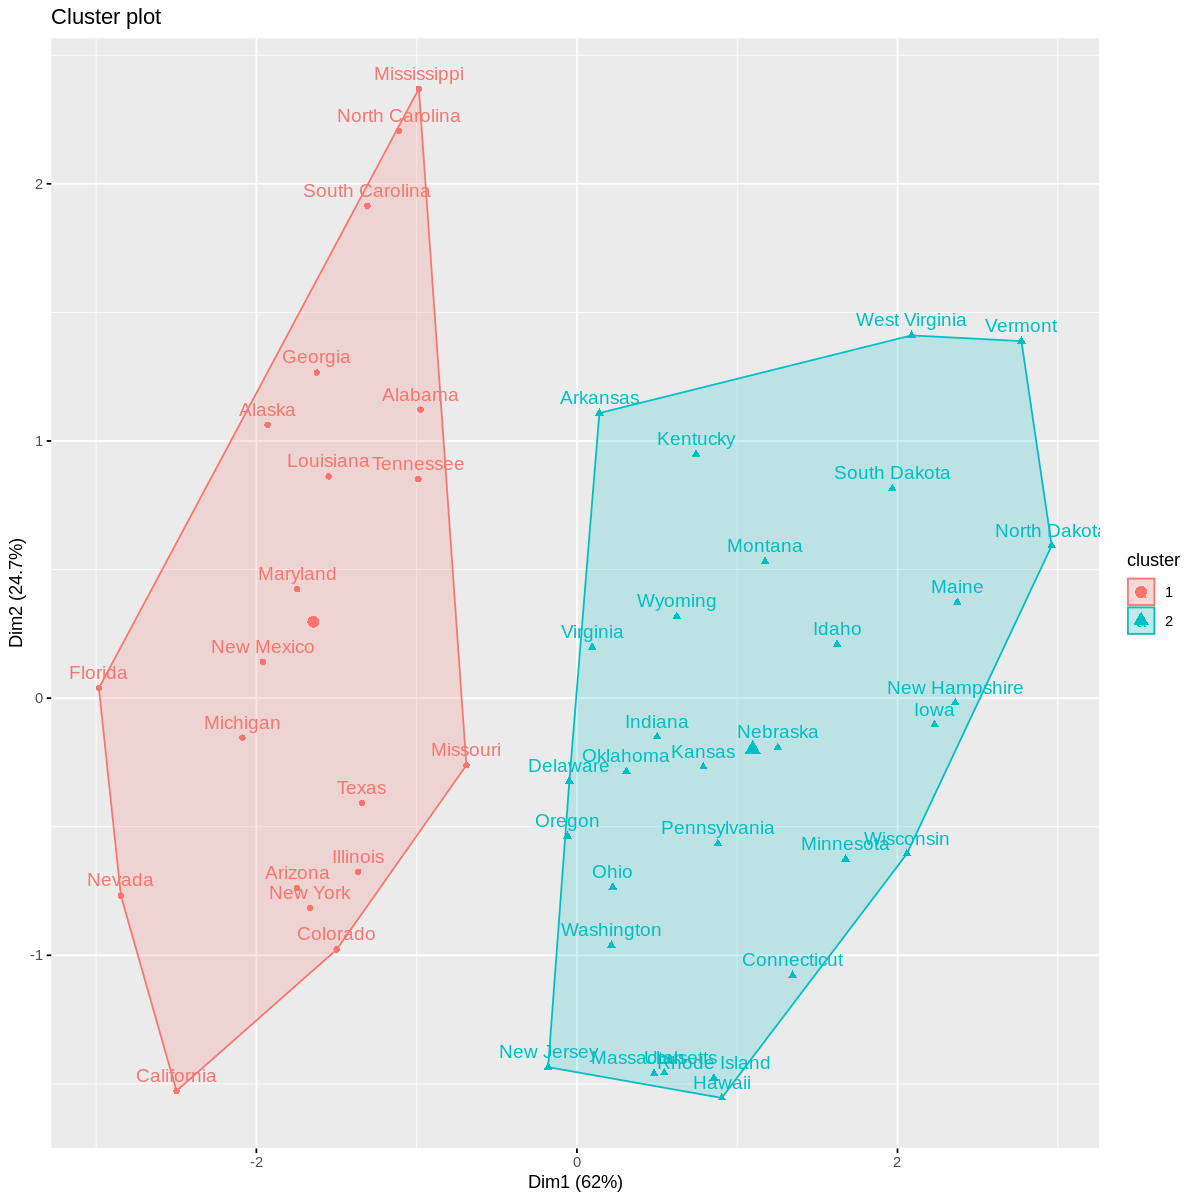

In [21]:
# We can also use this function to visualize. 

fviz_cluster(kclust, data=df)

We do not know the optimal number of clusters; we can try a few methods to see if we  can justify two clusters. 

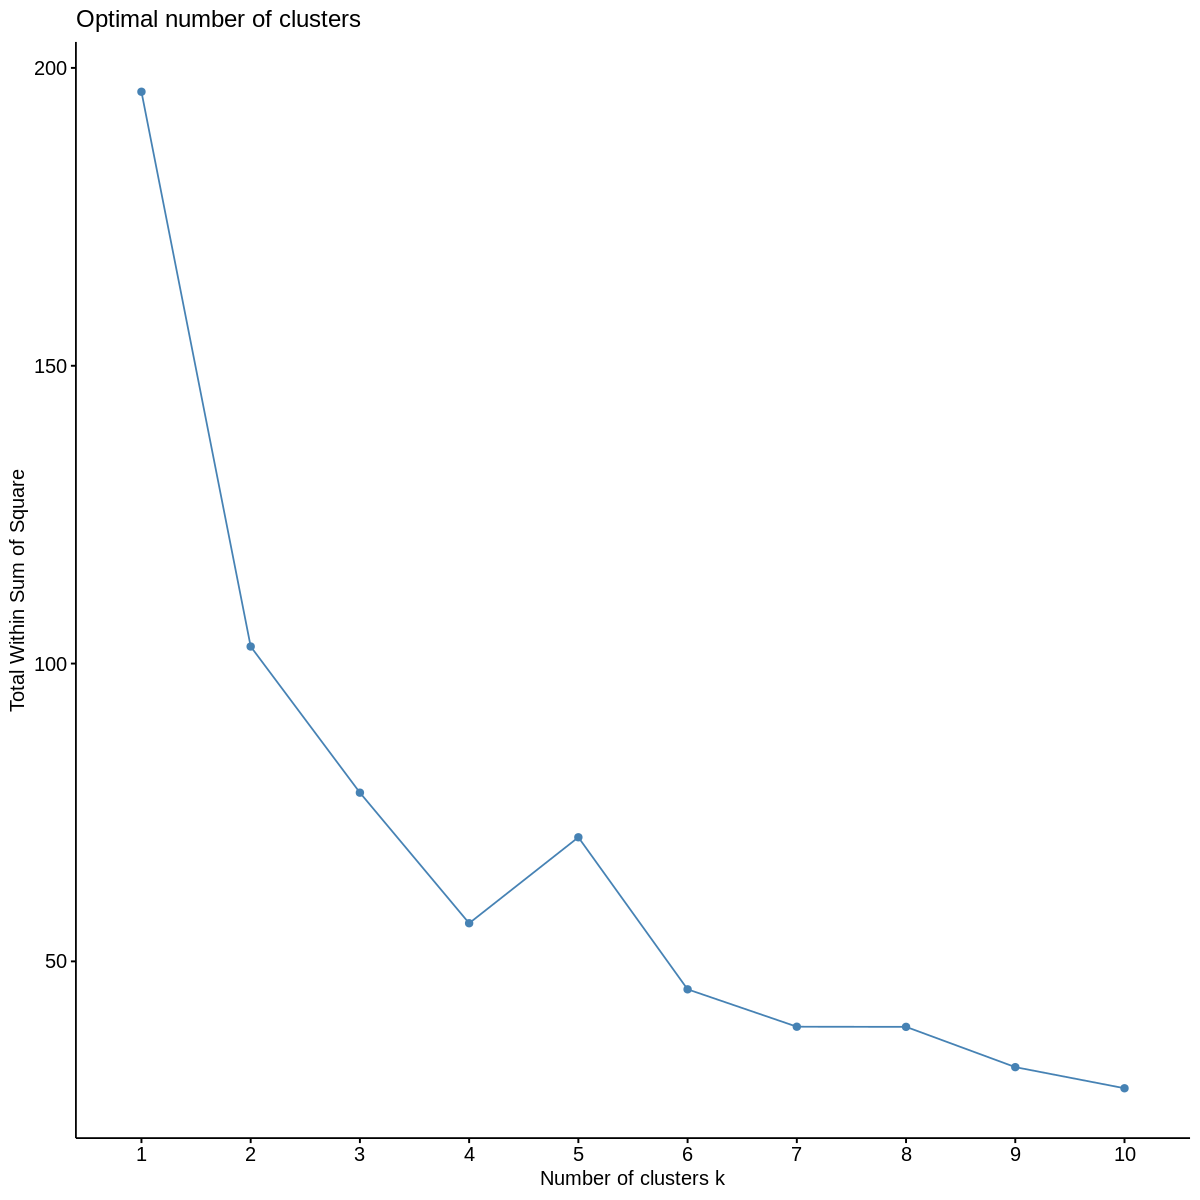

In [22]:
fviz_nbclust(df, kmeans, method = "wss")

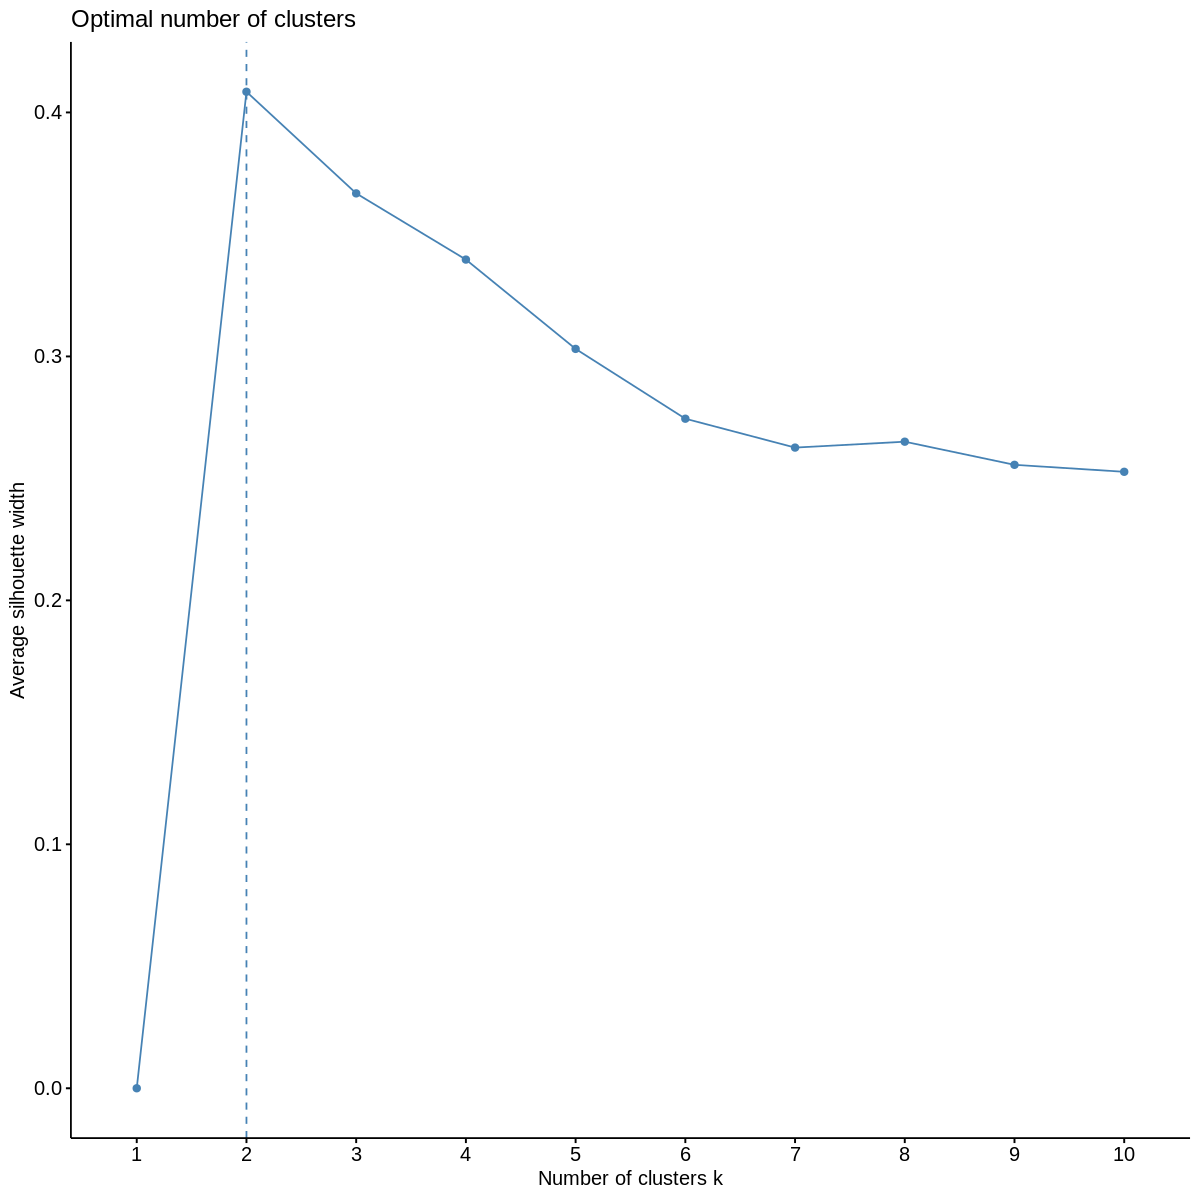

In [23]:
fviz_nbclust(df, kmeans, method = "silhouette")


In [24]:
gap_stat <- clusGap(df, FUN = kmeans, nstart = 20, K.max = 10, B = 50)

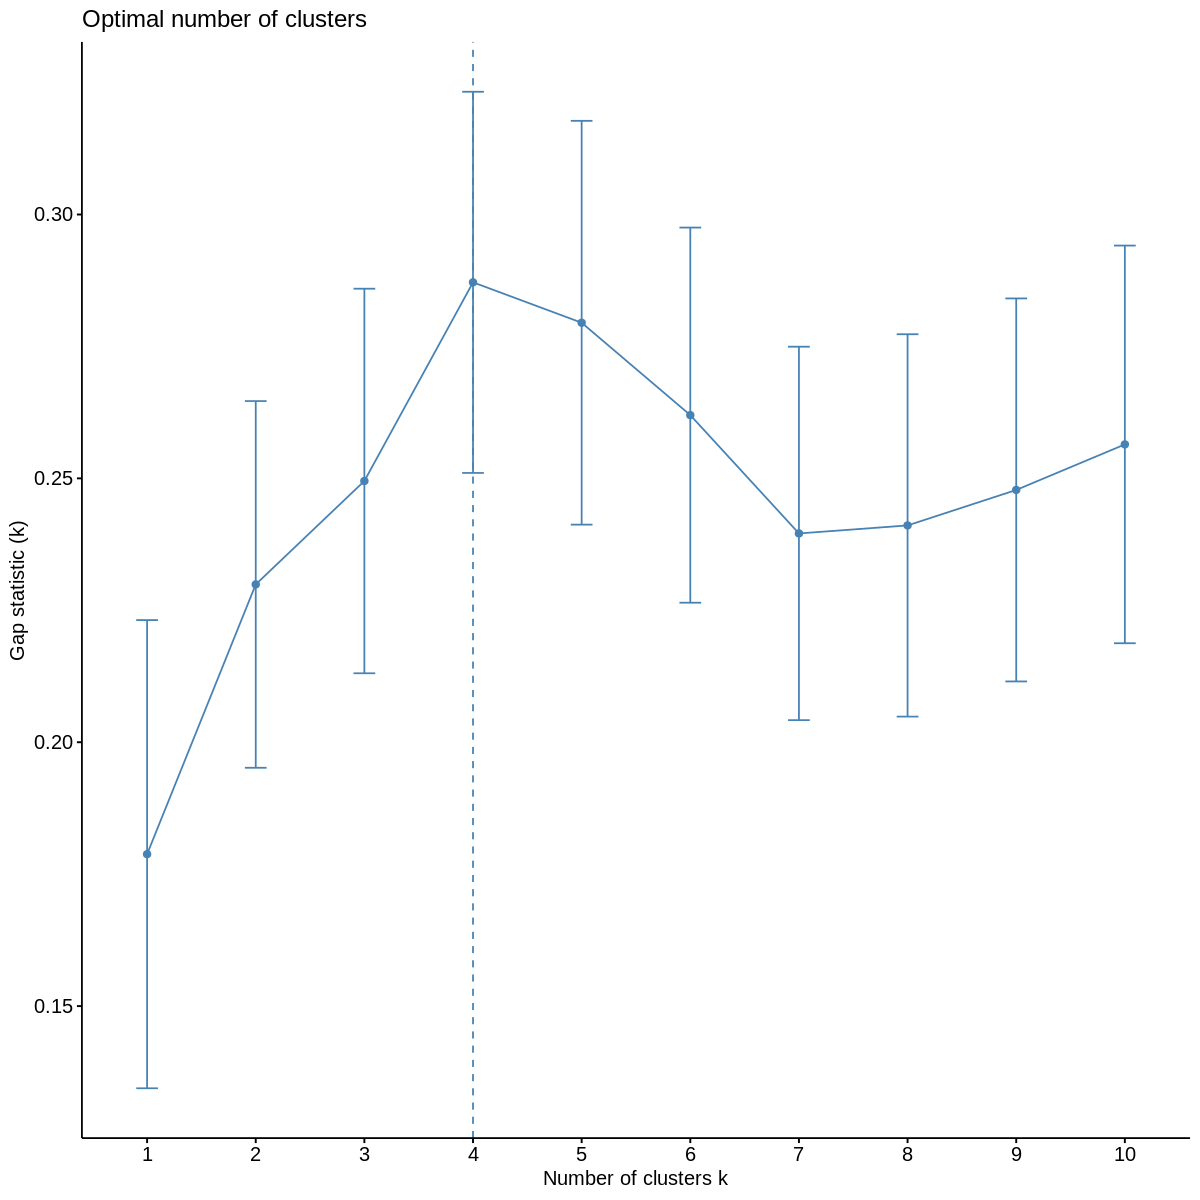

In [25]:
fviz_gap_stat(gap_stat)


*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


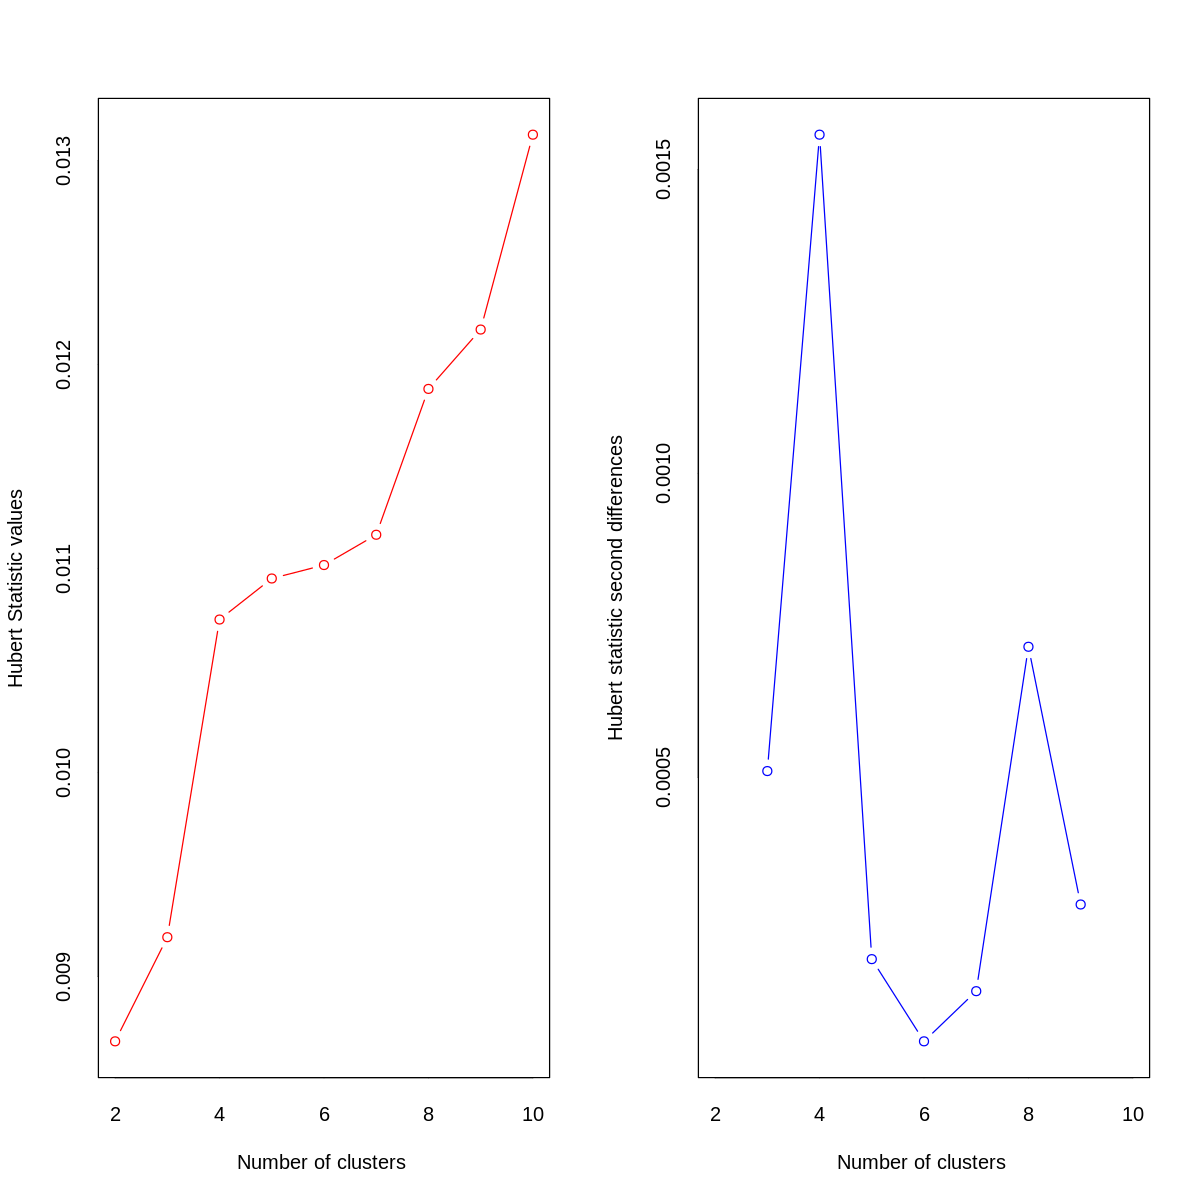

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 9 proposed 2 as the best number of clusters 
* 4 proposed 3 as the best number of clusters 
* 6 proposed 4 as the best number of clusters 
* 2 proposed 5 as the best number of clusters 
* 1 proposed 8 as the best number of clusters 
* 1 proposed 10 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  2 
 
 
******************************************************************* 


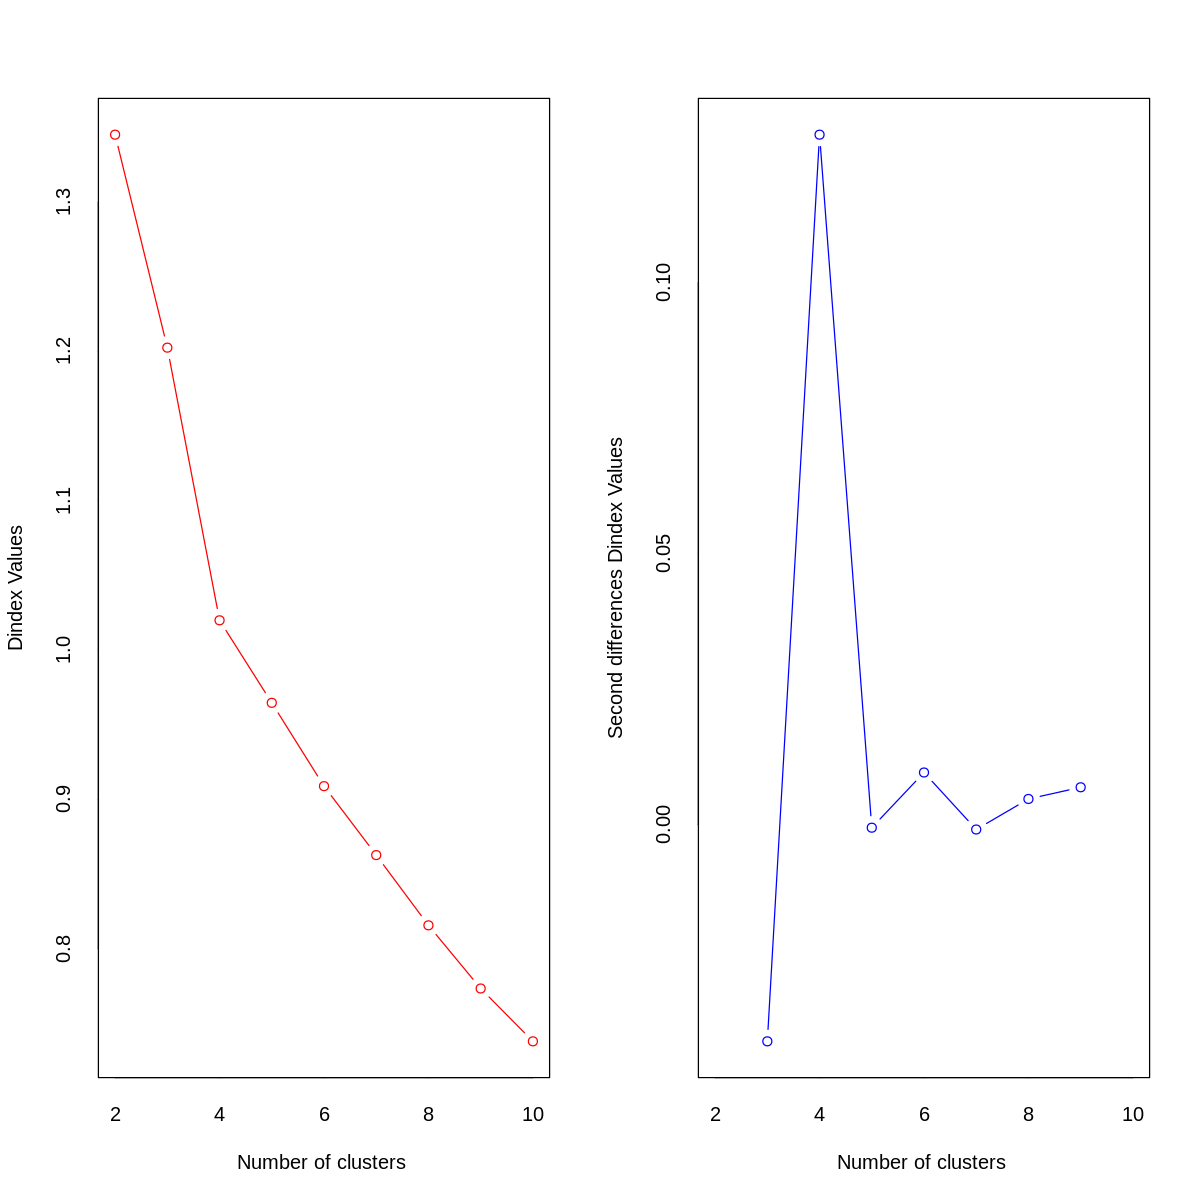

In [26]:
library(NbClust)
nb <- NbClust(df, distance = "euclidean", min.nc = 2,
        max.nc = 10, method = "complete", index ="all")

As suggested by nbclust, this data seems to have two clusters. 

Let's apply `pamk` and see what it finds for number of clusters and clusters themselves. 

In [27]:
help(pamk)

In [28]:
pamclust <- pamk(df, krange=1:5, critout=TRUE)

pamclust

1  clusters  0 
2  clusters  0.408489 
3  clusters  0.3143656 
4  clusters  0.3389904 
5  clusters  0.310517 


$pamobject
Medoids:
           ID     Murder    Assault   UrbanPop       Rape
New Mexico 31  0.8292944  1.3708088  0.3081225  1.1603196
Nebraska   27 -0.8008247 -0.8250772 -0.2445636 -0.5052109
Clustering vector:
       Alabama         Alaska        Arizona       Arkansas     California 
             1              1              1              2              1 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             1              2              2              1              1 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             2              2              1              2              2 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             2              2              1              2              1 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             2              1              2              1              1 
       Montana       Nebras

`pamk` also suggests two clusters. Below are the clusters produced by `pamk`:

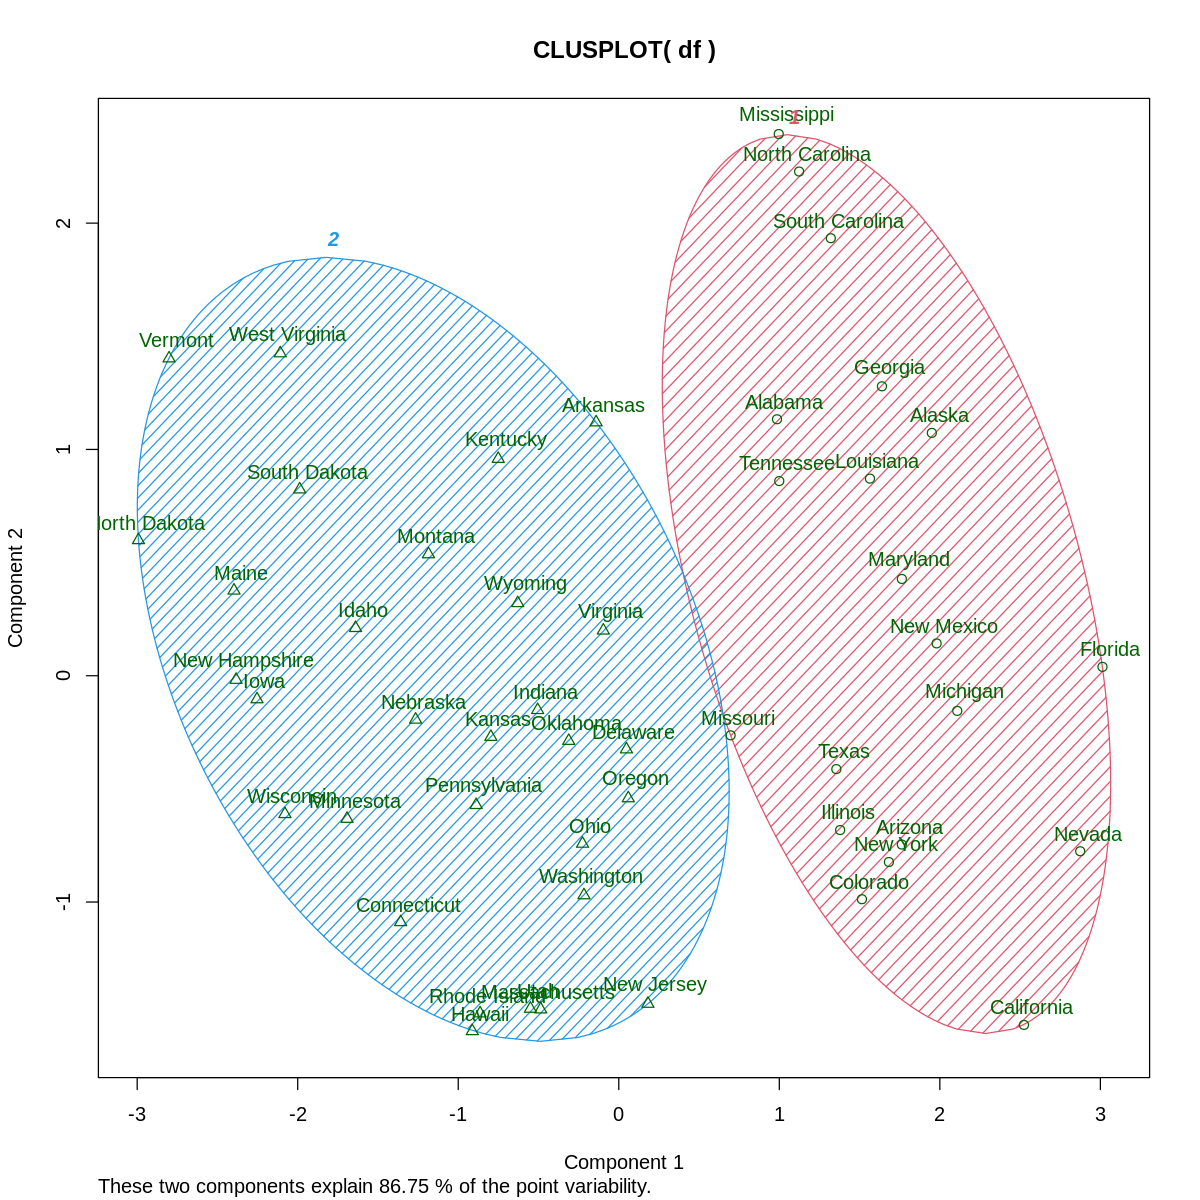

In [29]:
clusplot(df, pamclust$pamobject$clustering, color=TRUE, shade=TRUE, labels=2)


You can further analyze these clusters to find out what they have in common. You can look at the univariate statistics, figure out if factor analysis groups the variables for each cluster in some meaningful way, or see if there are associations between the variables that only exist in the clusters. 

---

Let's create another data set: we will read the red and white wine-quality data sets and combine them into one set. We will create a new variable named `type` and assign 1 for white and 2 for red wines. Then, we will try to cluster the data without looking at the `type` column and see if the unsupervised methods can find two natural clusters which conform with the red vs. white wine groups. 


In [30]:
wine.r <- read.csv("/dsa/data/all_datasets/wine-quality/winequality-red.csv", sep=";")

wine.w <- read.csv("/dsa/data/all_datasets/wine-quality/winequality-white.csv", sep=";")

# combine two data sets and add a type column: 1=white, 2=red 

wdf <- rbind(cbind(wine.w, type=rep(1,dim(wine.w)[1])),cbind(wine.r, type=rep(2,dim(wine.r)[1])))

In [31]:
head(wdf)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6,1
2,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6,1
3,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6,1
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6,1
5,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6,1
6,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6,1


In [32]:
# remove the type column
wdf_c_ <-  wdf[, which(names(wdf) != "type")]

wdf_c <- scale(wdf_c_) # try and see what happens if you do NOT scale.. 
head(wdf_c)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
-0.16607641,-0.4231505,0.284664137,3.2066822,-0.3149508,0.81550254,0.9599017,2.1020519,-1.3589443,-0.5461362,-1.4184490,0.207983
-0.70601915,-0.2409308,0.147034810,-0.8077751,-0.2007747,-0.93103539,0.2875954,-0.2323140,0.5068759,-0.2773296,-0.8315512,0.207983
0.68240504,-0.3624106,0.559922792,0.3061843,-0.1722307,-0.02959646,-0.3316341,0.1345149,0.2580999,-0.6133379,-0.3284958,0.207983
-0.01180706,-0.6661100,0.009405483,0.6424739,0.0561215,0.92818241,1.2429781,0.3012553,-0.1772582,-0.8821445,-0.4961809,0.207983
-0.01180706,-0.6661100,0.009405483,0.6424739,0.0561215,0.92818241,1.2429781,0.3012553,-0.1772582,-0.8821445,-0.4961809,0.207983
0.68240504,-0.3624106,0.559922792,0.3061843,-0.1722307,-0.02959646,-0.3316341,0.1345149,0.2580999,-0.6133379,-0.3284958,0.207983


Since we want to find out if we can differentiate between red and white wines, we'll take k=2: 

In [33]:
wclust <- kmeans(wdf_c, centers = 2, nstart = 20)


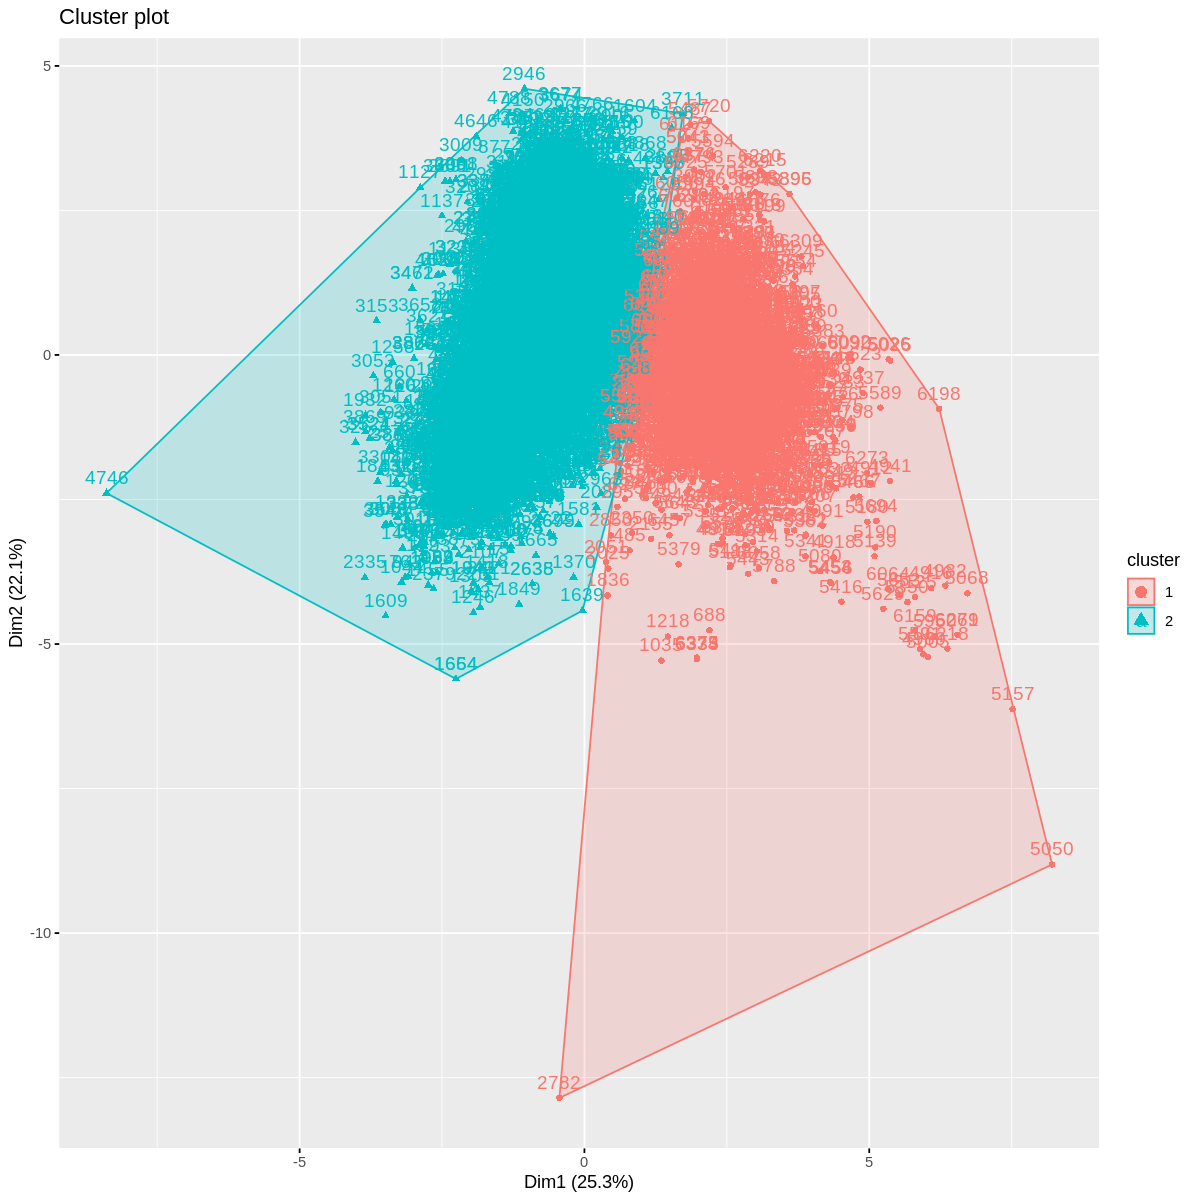

In [34]:
fviz_cluster(wclust, data=wdf_c)

Let's create a confusion table and compute an accuracy. **Remember** that we discussed how these cluster numbers are random; you should try 1 vs. 2 and find which cluster number assignment produces the highest accuracy. 

In [35]:
ctable_k <- table(wclust$cluster, wdf$type)
ctable_k
sum(diag(ctable_k))/dim(wdf_c)[1]



   
       1    2
  1   94 1574
  2 4804   25

[1] 0.01831615

What the clustering algorithm calls 1 and 2 actually correspond to 2 and 1, so if we compute the accuracy by considering that: 

In [36]:


(4804+1574)/dim(wdf_c)[1]



[1] 0.9816839

Considering that this is an unsupervised way of guessing red and white wines, it's actually pretty good. 

Remember that kmeans is not robust to outliers; let's try `pamk` and see what happens. 

**It takes a while to compute:**

In [37]:
 pamclust2 <- pamk(wdf_c, krange=1:5, critout=TRUE)


1  clusters  0 
2  clusters  0.2576284 
3  clusters  0.2099461 
4  clusters  0.1462073 
5  clusters  0.1191266 


`pamk` also suggests two clusters although the criteria are very close to each other. Let's look at the confusion table: 

In [38]:
ctable_p <- table(pamclust2$pamobject$clustering, wdf$type)
ctable_p

   
       1    2
  1 4843   74
  2   55 1525

In [39]:
sum(diag(ctable_p))/dim(wdf_c)[1]

[1] 0.9801447

Both methods are able to separate red and white wines successfully. This suggests that the variables form natural, and most probably convex, separable clusters for red and white wines. 

You can use similar approach to find natural clusters in data and analyze further what they have in common. 